In [22]:
#Importing Libraries

import warnings

warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Dataset


data = pd.read_csv("/content/AmazonReview.csv")
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [11]:

#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [13]:
#Data cleaning
stp_words=stopwords.words('english')
def clean_review(review):
cleanreview=" ".join(word for word in review.
					split() if word not in stp_words)
return cleanreview

data['Review']=data['Review'].apply(clean_review)


In [14]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


In [15]:
#Analysis of dataset

data['Sentiment'].value_counts()

Sentiment
0    15000
1    10000
Name: count, dtype: int64

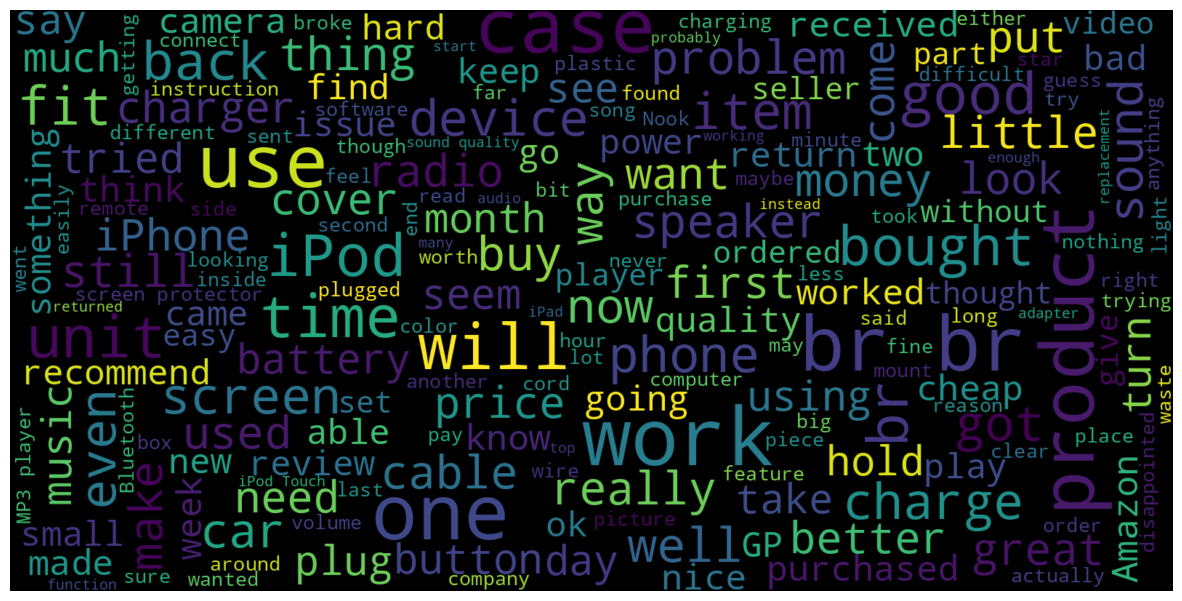

In [16]:
#For words with sentiment = 0

consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

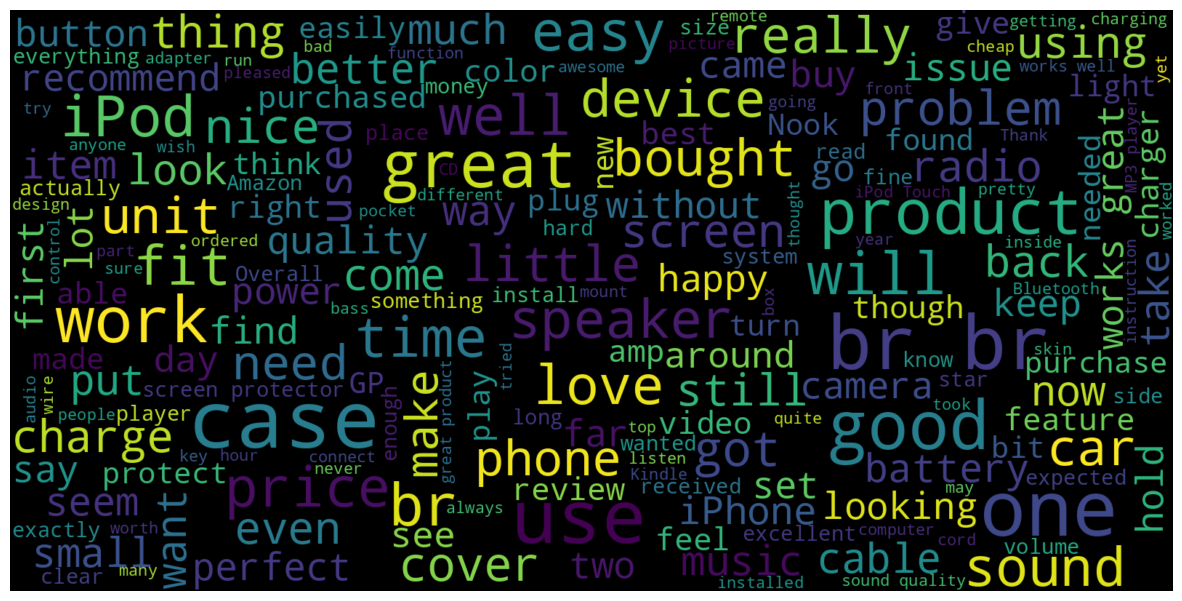

In [17]:
#For words with sentiment = 1

consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
cv = TfidfVectorizer(max_features=2500)
data = data.dropna(subset=['Review'])
X = cv.fit_transform(data['Review']).toarray()



In [25]:
#Model training, Evaulation and Prediction


from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [28]:
#Logical Regression

# Import the necessary module
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(metrics.accuracy_score(y_test,pred))

0.8304


Confusion Matrix

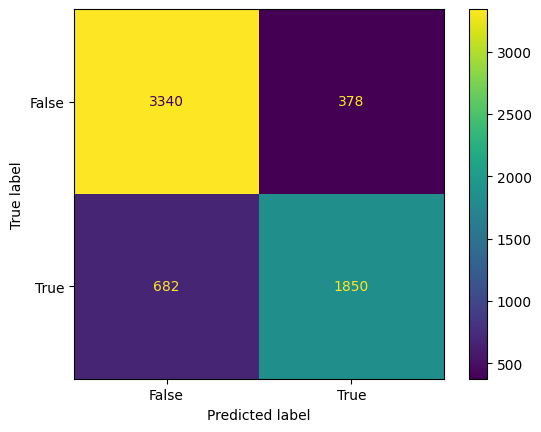

In [31]:

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()